In [11]:
import numpy as np
x = np.array([35,63,798,56])
print(x.ndim)
print(x.shape)

1
(4,)


In [3]:
import keras
import tensorflow as tf

In [5]:
# tensor 3種型態 constant variable placeholder
node1 = tf.constant(3)   #常數為3的tensor
node2 = tf.constant(4)   #常數為3的tensor
print(node1,node2)

#node 代表了兩個constant
sess = tf.Session()
print(sess.run([node1,node2]))

Tensor("Const_2:0", shape=(), dtype=int32) Tensor("Const_3:0", shape=(), dtype=int32)
[3, 4]


In [6]:
#建立運算圖 (流程)
node3 = tf.add(node1,node2)
print(node3)

Tensor("Add:0", shape=(), dtype=int32)


# Placeholder
#先建好運算圖再決定 input & output
這時候就需要placeholder 在還沒有資料時先佔位子

In [16]:
a = tf.placeholder(float)
b = tf.placeholder(float)
add_node = a+b
add_node
print(sess.run(add_node,{a:3,b:4.5}))
print(sess.run(add_node,{a:[1,3],b:[2,4]}))

7.5
[3. 7.]


In [26]:
input_data = tf.constant([1,3,4,6])
rank_input_data = tf.rank(input_data)
# tf.rank 會回傳一個張量的維數，而不是元素的數量
result = tf.argmax(input_data,0)
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    print(sess.run(rank_input_data))
    print(sess.run(result))
    print(sess)

1
3


In [35]:
t = tf.constant([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
sess = tf.Session()
print(sess.run(tf.shape(t)))
print(sess.run(tf.size(t)))
print(sess.run(tf.rank(t)))
print(sess)

[4 3]
12
2


張量
2D (sample, feature)
時間序列 3D (sample, timesteps, feature)
圖像 4D (sample, height, width, channels)  or (sample, channel, height, width)
視頻 5D (sample, frame, height, width, channels) or (sample, frame, channels, height, width)

In [33]:
x = np.array([[0,1],[2,3],[4,5]])
print(x.shape)
x = x.reshape((6,1))
x = x.reshape((2,3))
print(x)

(3, 2)
[[0 1 2]
 [3 4 5]]


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential([
    Dense(32,input_shape = (784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax')
])
#model.summary()
model = Sequential()
model.add(Dense(32,input_dim = 784))
model.add(Activation('relu'))
#model.summary()

optimizer: rmsprop adagrad
loss: categorical_crossentropy
metrics: accuracy

In [ ]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss = 'mse')


In [42]:
import keras.backend as k
def mean_pred(y_true,y_pred):
    return k.mean(y_pred)
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy',mean_pred])

In [64]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [65]:
data = np.random.random((1000,100))
labels = np.random.randint(2,size=(1000,1))
model.fit(data,labels,epochs=10,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1000/1000 [==============================] - 1s 628us/step - loss: 0.7021 - acc: 0.5060
Epoch 2/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6940 - acc: 0.5220
Epoch 3/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.6882 - acc: 0.5350
Epoch 4/10
1000/1000 [==============================] - 0s 46us/step - loss: 0.6844 - acc: 0.5500
Epoch 5/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6786 - acc: 0.5800
Epoch 6/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.6733 - acc: 0.5810
Epoch 7/10
1000/1000 [==============================] - 0s 46us/step - loss: 0.6685 - acc: 0.5920
Epoch 8/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.6669 - acc: 0.5870
Epoch 9/10
1000/1000 [==============================] - 0s 49us/step - loss: 0.6627 - acc: 0.6050
Epoch 10/10
1000/1000 [==============================] - 0s 47us/step

In [46]:
data.shape

(1000, 100)

In [67]:
np.random.randint(3,size=(10,1))

array([[1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [1]])

In [70]:
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=100))
model.add(Dense(10,activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.001,decay=1e-6,momentum=0.7),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [72]:
data = np.random.random((1000,100))
labels = np.random.randint(10,size=(1000,1))
one_hot_label = keras.utils.to_categorical(labels)
model.fit(data,one_hot_label,epochs=20,batch_size=32)

Epoch 1/20
1000/1000 [==============================] - 0s 327us/step - loss: 2.3183 - acc: 0.0890
Epoch 2/20
1000/1000 [==============================] - 0s 43us/step - loss: 2.3142 - acc: 0.0930
Epoch 3/20
1000/1000 [==============================] - 0s 41us/step - loss: 2.3116 - acc: 0.0900
Epoch 4/20
1000/1000 [==============================] - 0s 44us/step - loss: 2.3093 - acc: 0.0930
Epoch 5/20
1000/1000 [==============================] - 0s 37us/step - loss: 2.3076 - acc: 0.0990
Epoch 6/20
1000/1000 [==============================] - 0s 43us/step - loss: 2.3062 - acc: 0.0990
Epoch 7/20
1000/1000 [==============================] - 0s 44us/step - loss: 2.3048 - acc: 0.1050
Epoch 8/20
1000/1000 [==============================] - 0s 43us/step - loss: 2.3036 - acc: 0.1100
Epoch 9/20
1000/1000 [==============================] - 0s 44us/step - loss: 2.3026 - acc: 0.1110
Epoch 10/20
1000/1000 [==============================] - 0s 46us/step - loss: 2.3015 - acc: 0.1110
Epoch 11/20
1000/1

In [74]:
from keras.datasets import reuters
(train_data, train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 2us/step


In [79]:
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)
print(len(train_data[10]))

(8982,) (8982,)
(2246,) (2246,)
31


In [78]:
def vectorize_sequence(seq, dim = 10000):
    results = np.zeros((len(seq),dim))
    for i , seq in enumerate(seq):
        results[i,seq]=1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

def one_hot_seq(seq, dim = 46):
    results = np.zeros((len(seq),dim))
    for i , seq in enumerate(seq):
        results[i,seq]=1.
    return results

y_train = one_hot_seq(train_labels)
y_test = one_hot_seq(test_labels)

In [123]:
from keras import models,layers
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=10000))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(46,activation='softmax'))
adam = Adam(lr = .001, decay = 1e-5)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [124]:
x_val = x_train[-1000:]
part_x_train = x_train[:-1000]
y_val = y_train[-1000:]
part_y_train = y_train[:-1000]

history = model.fit(part_x_train,part_y_train,epochs=20,batch_size=64,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 328us/step - loss: 1.9383 - acc: 0.5757 - val_loss: 1.4387 - val_acc: 0.6940
Epoch 2/20
7982/7982 [==============================] - 2s 232us/step - loss: 1.1955 - acc: 0.7289 - val_loss: 1.1967 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.9273 - acc: 0.7979 - val_loss: 1.0891 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 2s 235us/step - loss: 0.7346 - acc: 0.8425 - val_loss: 1.0130 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.5881 - acc: 0.8717 - val_loss: 0.9625 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 290us/step - loss: 0.4751 - acc: 0.9005 - val_loss: 0.9264 - val_acc: 0.7850
Epoch 7/20
7982/7982 [==============================] - 2s 233us/step - loss: 0.3863 - acc: 0.9208 - val_loss: 0.9418 - val_acc: 0.7880


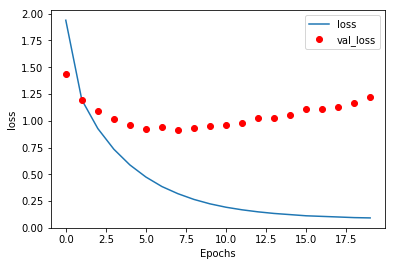

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.epoch,history.history['loss'],label='loss')
plt.plot(history.epoch,history.history['val_loss'],'or',label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [136]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\ASUS\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [147]:
from sklearn.externals import joblib
loadknnmodel = joblib.load('iris_knn.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.0 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [148]:
loadknnmodel

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [143]:
print('請輸入鳶尾花樣本尺寸(單位為公分):')
sepal_len = float(input('sepal len in cm:'))
sepal_wid = float(input('sepal wid in cm:'))
petal_len = float(input('petal len in cm:'))
petal_wid = float(input('petal wid in cm:'))
input_array = np.array([[sepal_len,sepal_wid,petal_len,petal_wid]])

請輸入鳶尾花樣本尺寸(單位為公分):
sepal len in cm:4
sepal wid in cm:6
petal len in cm:3
petal wid in cm:8


In [146]:
input_array

array([[4., 6., 3., 8.]])

In [144]:
pred = loadknnmodel.predict(input_array)
dict_iris = {0:'iris-setose',1:'versicolor',2:'virginion'}
print('='*50)
print('鳶尾花樣本尺寸')
print('預測品種為:',dict_iris[pred[0]])

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [149]:
import numpy as np
#import joblib module
#conda install -c anaconda joblib
##pip install tqdm
from sklearn.externals import joblib 
#將 model file 'iris_knn.pkl' 以 joblib.load() 載入
loadKnnModel=joblib.load('iris_knn.pkl')

#=================================================
#使用者輸入介面:
print("請輸入鳶尾花)樣本尺寸(單位為公分):")
sepal_length=float(input("sepal length in cm (花瓣長):"))
sepal_width=float(input("sepal width in cm (花瓣寬):"))
petal_length=float(input("petal length in cm (花萼長):"))
petal_width=float(input("petal width in cm  (花萼寬):"))
input_list=[sepal_length,sepal_width,petal_length,petal_width]

#將使用者輸入轉成(1,4)的numpy.ndarray
input_array=np.array([input_list])

#以loadKnnModel 對輸入樣本作品種預測
pred=loadKnnModel.predict(input_array)

#建立一個輸出字典 "dict_iris"
dict_iris={0: 'Iris-setosa', 1: 'Iris-versicolor',2: 'Iris-virginica'}

#列印預測結果
#印出預測鳶尾花樣本的品種
print("=========================================")
print("鳶尾花樣本尺寸:")
print("sepal length in cm (花瓣長):",sepal_length," \n",
      "sepal width in cm (花瓣寬):",sepal_width," \n",
     "petal length in cm (花萼長):",petal_length,"\n ",
     "petal width in cm  (花萼寬):",petal_width)
print("預測品種是:",dict_iris[pred[0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.0 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


請輸入鳶尾花)樣本尺寸(單位為公分):
sepal length in cm (花瓣長):5
sepal width in cm (花瓣寬):6
petal length in cm (花萼長):5
petal width in cm  (花萼寬):8


TypeError: '<' not supported between instances of 'NoneType' and 'int'